In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
#warnings.filterwarnings('ignore',category='FutureWarning')
#warnings.filterwarnings('ignore',category='DeprecationWarning')

In [2]:
train = pd.read_csv('dataset/hm_train.csv')
train.head()

,hmid,reflection_period,cleaned_hm,num_sentence,predicted_category
0,27673,24h,I went on a successful date with someone I fel...,1,affection
1,27674,24h,I was happy when my son got 90% marks in his e...,1,affection
2,27675,24h,I went to the gym this morning and did yoga.,1,exercise
3,27676,24h,We had a serious talk with some friends of our...,2,bonding
4,27677,24h,I went with grandchildren to butterfly display...,1,affection


In [3]:
train.shape

(60321, 5)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60321 entries, 0 to 60320
Data columns (total 5 columns):
hmid                  60321 non-null int64
reflection_period     60321 non-null object
cleaned_hm            60321 non-null object
num_sentence          60321 non-null int64
predicted_category    60321 non-null object
dtypes: int64(2), object(3)
memory usage: 2.3+ MB


In [5]:
test = pd.read_csv('dataset/hm_test.csv')
test.head()

,hmid,reflection_period,cleaned_hm,num_sentence
0,88305,3m,I spent the weekend in Chicago with my friends.,1
1,88306,3m,We moved back into our house after a remodel. ...,2
2,88307,3m,My fiance proposed to me in front of my family...,1
3,88308,3m,I ate lobster at a fancy restaurant with some ...,1
4,88309,3m,I went out to a nice restaurant on a date with...,5


In [6]:
test.shape

(40213, 4)

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40213 entries, 0 to 40212
Data columns (total 4 columns):
hmid                 40213 non-null int64
reflection_period    40213 non-null object
cleaned_hm           40213 non-null object
num_sentence         40213 non-null int64
dtypes: int64(2), object(2)
memory usage: 1.2+ MB


In [8]:
# check the null value in train data
train.isnull().any()

hmid                  False
reflection_period     False
cleaned_hm            False
num_sentence          False
predicted_category    False
dtype: bool

In [10]:
train['predicted_category'].value_counts()

affection           20880
achievement         20274
bonding              6561
enjoy_the_moment     6508
leisure              4242
nature               1127
exercise              729
Name: predicted_category, dtype: int64

### EDA

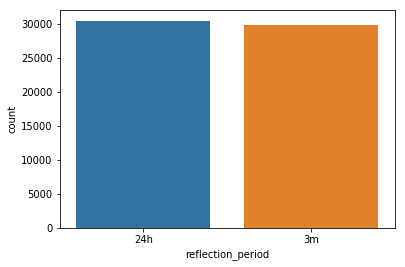

In [11]:
sns.countplot(x='reflection_period',data=train)
plt.show()


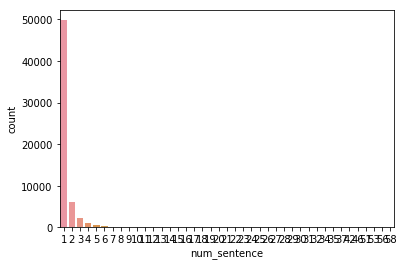

In [12]:
sns.countplot(x='num_sentence',data=train)
plt.show()


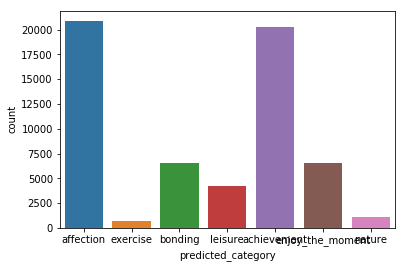

In [13]:
sns.countplot(x='predicted_category',data=train)
plt.show()

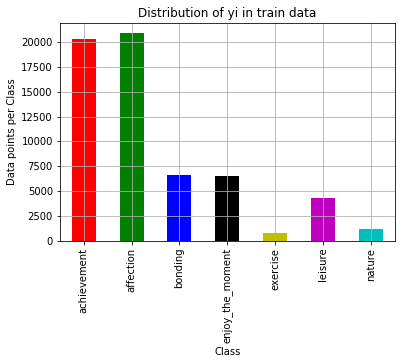

Number of data points in class 2 : 20880 ( 34.615 %)
Number of data points in class 1 : 20274 ( 33.61 %)
Number of data points in class 3 : 6561 ( 10.877 %)
Number of data points in class 4 : 6508 ( 10.789 %)
Number of data points in class 6 : 4242 ( 7.032 %)
Number of data points in class 7 : 1127 ( 1.868 %)
Number of data points in class 5 : 729 ( 1.209 %)


In [15]:
train_class = train['predicted_category'].value_counts().sort_index()
my_colors = ['r','g','b','k','y','m','c']
train_class.plot(kind='bar',color=my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

sorted_yi = np.argsort(-train_class)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',train_class.values[i], 
          '(', np.round((train_class.values[i]/train.shape[0]*100), 3), '%)')

###  Word Cloud of train data


(-0.5, 3999.5, 2199.5, -0.5)

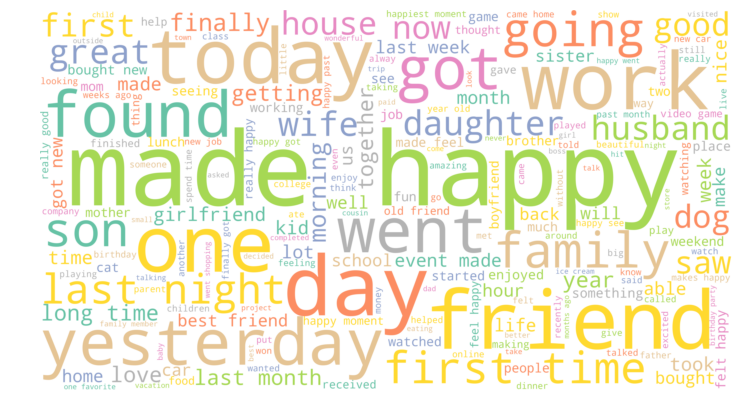

In [17]:

from wordcloud import WordCloud
text = ' '.join(train['cleaned_hm'].tolist())
wordcloud = WordCloud(background_color="white", height=2200, width=4000).generate(text)
plt.figure( figsize=(18,7) )
plt.imshow(wordcloud.recolor(colormap=plt.get_cmap('Set2')), interpolation='bilinear')
plt.axis("off")

### Data cleaning

In [19]:
# check the nan value in train data
for i in train.columns:
    print(i,train[i].isnull().sum())

hmid 0
reflection_period 0
cleaned_hm 0
num_sentence 0
predicted_category 0


In [20]:
import re
def decontracted(text): #
    # specific
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"don\'t"," do not",text)
    text = re.sub(r"did\'t","did not",text)
    text = re.sub(r"haven\'t","have not",text)
    text = re.sub(r"wouldn\'t","would not",text)
    text = re.sub(r"couldn\'t","could not",text)
    text = re.sub(r"shouldn\'t","should not",text)
    text = re.sub(r"wasn\'t","was not",text)
    text = re.sub(r"weren\'t","were not",text)
    text = re.sub(r"hadn\t'","had not",text)

    # general
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    return text

In [21]:
import re
def clean_text(text):
    text = text.lower()
    text = re.sub(r'((www\.[S]+)|(https?://[\S]+))','URL',text)# replcae the website link to only "URL"
    text = re.sub(r'#','',text) # Removing hash(#) symbol .
    text = re.sub(r"$",'',text) # remove $ symbl
    text = re.sub(r',', '', text) # Removing comma symbol
    text = re.sub(r'\.\.+',' ',text) # Replacing two or more dot to single space
    text = re.sub(r'!+',' ',text) # Replacing single or more than one explanation symbol to single space
    text = re.sub(r'\*+',' ',text) # Replacing one or more star(*) symbol to single space
    text = re.sub(r';+',' ',text)   # Replacing  single semicolor(;)  or more semicolon(;) symbol to single space
    text = re.sub(r':+',' ',text)   # Replacing single colon(:) or more colon(:) sybol to single space
    text = re.sub(r"\'+",' ', text) # Replacing single quote or more single quote to single space
    text = re.sub(r'\"+',' ', text) # Replacing double quote or more double  quote to single space
    text = re.sub(r'\?+',' ', text) # Replacing single question mark or more question mark to single space
    text = re.sub(r'-+', ' ', text) # Replacing single hypen  symbol or more hypen symbol  to single space
    text = re.sub(r'_+','',text) # remove single underscore or more to single space
    text = re.sub(r'[\(\)]+',' ', text) # Replacing left paranthesis or right paraen
    #text = re.sub(r'[.' +']+','',text) # remove dot folwoed by space like this . . . . 
    text = re.sub(r' +',' ',text) # Replacing two or more white space to single white space
    text = re.sub(r'[@$]','',text) # remove special symbol such as @ $
    text = re.sub(r'[0-9]','',text) # remove numbers
    text = re.sub(r'[/]', ' ',text) # remove forward slash
    test = re.sub(r'[%]', ' ',text) # remove % symbol
    #text = re.sub(r'\b[a-z]','',text) # remove single a,b,c..... characters
    return text

In [22]:
train['cleaned_text'] = train['cleaned_hm'].map(decontracted)
train['cleaned_text'] = train['cleaned_text'].map(clean_text)

In [23]:
train.head()

,hmid,reflection_period,cleaned_hm,num_sentence,predicted_category,cleaned_text
0,27673,24h,I went on a successful date with someone I fel...,1,affection,i went on a successful date with someone i fel...
1,27674,24h,I was happy when my son got 90% marks in his e...,1,affection,i was happy when my son got % marks in his exa...
2,27675,24h,I went to the gym this morning and did yoga.,1,exercise,i went to the gym this morning and did yoga.
3,27676,24h,We had a serious talk with some friends of our...,2,bonding,we had a serious talk with some friends of our...
4,27677,24h,I went with grandchildren to butterfly display...,1,affection,i went with grandchildren to butterfly display...


In [24]:
test['cleaned_text'] = test['cleaned_hm'].map(decontracted)
test['cleaned_text'] = test['cleaned_text'].map(clean_text)

In [25]:
test.head()

,hmid,reflection_period,cleaned_hm,num_sentence,cleaned_text
0,88305,3m,I spent the weekend in Chicago with my friends.,1,i spent the weekend in chicago with my friends.
1,88306,3m,We moved back into our house after a remodel. ...,2,we moved back into our house after a remodel. ...
2,88307,3m,My fiance proposed to me in front of my family...,1,my fiance proposed to me in front of my family...
3,88308,3m,I ate lobster at a fancy restaurant with some ...,1,i ate lobster at a fancy restaurant with some ...
4,88309,3m,I went out to a nice restaurant on a date with...,5,i went out to a nice restaurant on a date with...


In [26]:
test.drop(['cleaned_hm'],axis=1,inplace=True)

In [27]:
train.drop(['hmid','cleaned_hm'],axis=1,inplace=True)

In [29]:
test.head()

,hmid,reflection_period,num_sentence,cleaned_text
0,88305,3m,1,i spent the weekend in chicago with my friends.
1,88306,3m,2,we moved back into our house after a remodel. ...
2,88307,3m,1,my fiance proposed to me in front of my family...
3,88308,3m,1,i ate lobster at a fancy restaurant with some ...
4,88309,3m,5,i went out to a nice restaurant on a date with...


### Model Bulding

,reflection_period,num_sentence,predicted_category,cleaned_text
0,24h,1,affection,i went on a successful date with someone i fel...
1,24h,1,affection,i was happy when my son got % marks in his exa...
2,24h,1,exercise,i went to the gym this morning and did yoga.
3,24h,2,bonding,we had a serious talk with some friends of our...
4,24h,1,affection,i went with grandchildren to butterfly display...


In [31]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn import preprocessing
rp_le = LabelEncoder()
# enc = preprocessing.OneHotEncoder()
# enc.fit(train['reflection_period'])
rp_ohe = rp_le.fit_transform(train['reflection_period'])
#rp_label = rp_ohe.fit_transform(train['reflection_period'].values.reshape(-1,1)).toarray()
train['Reflection_period_label'] = rp_ohe

In [32]:
pc = LabelEncoder()
pc_label = pc.fit_transform(train['predicted_category'])
train['predicted_category_label'] = pc_label

# enc_cl = preprocessing.OneHotEncoder()
# enc_cl.fit(train['predicted_category'])
# rp_ohe_cl = enc_cl.transform(train['predicted_category'])
# #rp_label = rp_ohe.fit_transform(train['reflection_period'].values.reshape(-1,1)).toarray()
# train['predicted_category_label'] = rp_ohe_cl

In [33]:
rp_test_le = LabelEncoder()
# enc = preprocessing.OneHotEncoder()
# enc.fit(train['reflection_period'])
rp_test_ohe = rp_test_le.fit_transform(test['reflection_period'])
#rp_label = rp_ohe.fit_transform(train['reflection_period'].values.reshape(-1,1)).toarray()
test['Reflection_period_label'] = rp_test_ohe

,hmid,reflection_period,num_sentence,cleaned_text,Reflection_period_label
0,88305,3m,1,i spent the weekend in chicago with my friends.,1
1,88306,3m,2,we moved back into our house after a remodel. ...,1
2,88307,3m,1,my fiance proposed to me in front of my family...,1
3,88308,3m,1,i ate lobster at a fancy restaurant with some ...,1
4,88309,3m,5,i went out to a nice restaurant on a date with...,1


In [35]:
test.drop(['reflection_period'],axis=1,inplace=True)

,hmid,num_sentence,cleaned_text,Reflection_period_label
0,88305,1,i spent the weekend in chicago with my friends.,1
1,88306,2,we moved back into our house after a remodel. ...,1
2,88307,1,my fiance proposed to me in front of my family...,1
3,88308,1,i ate lobster at a fancy restaurant with some ...,1
4,88309,5,i went out to a nice restaurant on a date with...,1


In [38]:
train.drop(['reflection_period','predicted_category'],axis=1,inplace=True)

In [39]:
train.head()

,num_sentence,cleaned_text,Reflection_period_label,predicted_category_label
0,1,i went on a successful date with someone i fel...,0,1
1,1,i was happy when my son got % marks in his exa...,0,1
2,1,i went to the gym this morning and did yoga.,0,4
3,2,we had a serious talk with some friends of our...,0,2
4,1,i went with grandchildren to butterfly display...,0,1


In [40]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [41]:
train['predicted_category_label'].value_counts()

1    20880
0    20274
2     6561
3     6508
5     4242
6     1127
4      729
Name: predicted_category_label, dtype: int64

In [42]:
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

### Bag of Words

In [43]:
# bag of word
clean_text_count = CountVectorizer(lowercase=True,stop_words=STOPWORDS)

text_train = clean_text_count.fit_transform(train['cleaned_text'])
text_test = clean_text_count.transform(test['cleaned_text'])


In [44]:
# normalization of train and test data
text_train = preprocessing.normalize(text_train)
text_test = preprocessing.normalize(text_test)

In [45]:
y_train = train['predicted_category_label'] # actual label of train data

### Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
log_reg = LogisticRegression()
param_grid = {'C':[1000,500,100,50,10,5,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001],
             'penalty':['l1','l2']} 
gscv = GridSearchCV(log_reg,param_grid,scoring='f1_weighted', cv=10,verbose=1,n_jobs=3) 
gscv.fit(text_train,y_train)
print("Best HyperParameter: ",gscv.best_params_)
print("Best Accuracy: %.2f%%"%(gscv.best_score_*100))

Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:  6.4min
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed: 14.6min
[Parallel(n_jobs=3)]: Done 300 out of 300 | elapsed: 15.3min finished


Best HyperParameter:  {'C': 10, 'penalty': 'l2'}
Best Accuracy: 90.50%


In [47]:
lr = LogisticRegression(C=10,penalty='l2')
lr.fit(text_train,y_train)
y_pred =lr.predict(text_test)

In [54]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import RandomizedSearchCV
sgd = SGDClassifier()
#params we need to try on classifier
param_dist = {'penalty':['l1','l2','elasticnet'],
             'alpha':[500,100,50,10,5,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001,0.00005,0.00001]} 
gscv = RandomizedSearchCV(sgd,param_dist,cv=10,scoring='f1_weighted',verbose=1)
gscv.fit(text_train,y_train)
print("Best HyperParameter: ",gscv.best_params_)
print("Best Accuracy: %.2f%%"%(gscv.best_score_*100))

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   36.6s finished


Best HyperParameter:  {'penalty': 'l2', 'alpha': 1e-05}
Best Accuracy: 89.56%


In [58]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
param_grid = {'gamma':[0.5,0.1,0.05,0.01],
             'C':[5,0.5,0.1,0.05]} #params we need to try on classifier

gscv = RandomizedSearchCV(svc,param_grid,cv=5,verbose=1,n_jobs=3,scoring='f1_weighted')
gscv.fit(text_train,y_train)
print("Best HyperParameter: ",gscv.best_params_)
print("Best Accuracy: %.2f%%"%(gscv.best_score_*100))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed: 109.1min
[Parallel(n_jobs=3)]: Done  50 out of  50 | elapsed: 119.8min finished


Best HyperParameter:  {'gamma': 0.5, 'C': 5}
Best Accuracy: 89.38%


In [59]:
svc = SVC(C=5,gamma=0.5)
svc.fit(text_train,y_train)
y_pred =lr.predict(text_test)

In [60]:
output = pd.DataFrame(data={"hmid":test['hmid'],'predicted_category':y_pred}).to_csv('submission_svm_.csv',index=False)

In [61]:
def label_change(i):
    if i==0:
        return 'achievement'
    elif i==1:
        return 'affection'
    elif i== 2:
        return 'bonding'
    elif i==3:
        return 'enjoy_the_moment'
    elif i==4:
        return 'exercise'
    elif i==5:
        return 'leisure'
    elif i==6:
        return 'nature'
    

In [62]:
submit= pd.read_csv('submission_svm_.csv')
submit.head()

,hmid,predicted_category
0,88305,2
1,88306,0
2,88307,1
3,88308,2
4,88309,1


In [63]:
submit['predicted_category'] = submit['predicted_category'].map(label_change)

In [64]:
output = pd.DataFrame(data={"hmid":submit['hmid'],'predicted_category':submit['predicted_category']}).to_csv('submission_svm_final.csv',index=False)